# Problem 1.1: Bank Marketing Data
Aaron Bell

# Problem Background Info:

The webpage for the dataset is located here: https://archive.ics.uci.edu/ml/datasets/bank+marketing

Simple descriptions for each column are given as follows:
Input variables:
# bank client data:
1 - age (numeric)  
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')  
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)  
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')  
5 - default: has credit in default? (categorical: 'no','yes','unknown')  
6 - housing: has housing loan? (categorical: 'no','yes','unknown')  
7 - loan: has personal loan? (categorical: 'no','yes','unknown')  
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')   
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')  
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')  
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no').   
Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.  
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)  
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)  
14 - previous: number of contacts performed before this campaign and for this client (numeric)  
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')  
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)  
17 - cons.price.idx: consumer price index - monthly indicator (numeric)   
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)   
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)  
20 - nr.employed: number of employees - quarterly indicator (numeric)  
  
Output variable (desired target):  
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')  

# -1) Import core packages

In [1]:
# for displaying plots in a notebook
%matplotlib inline 

import numpy as np # simply array and mathematical operations
import pandas as pd # R-like handling with dataframes, etc.
import seaborn as sb # for making your statistical plots look pretty

# 0) Data splitting

Since the dataset for problem 1.1, is already privided in a split form by the original archive. Thus we simply import the training data for the moment, and won't lay any eyes on the testing data until we have a working model.

# 1) Data loading
The pandas package allows for easy reading-in of CSV and other files. 
We'll load the data into a pandas dataframe (analagous to R dataframes), in then take a quick look at how it's stuctured.

In [2]:
train = pd.read_csv('data/raw/bank-additional/bank-additional.csv')
#train = pd.DataFrame()

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 1 columns):
age;"job";"marital";"education";"default";"housing";"loan";"contact";"month";"day_of_week";"duration";"campaign";"pdays";"previous";"poutcome";"emp.var.rate";"cons.price.idx";"cons.conf.idx";"euribor3m";"nr.employed";"y"    4119 non-null object
dtypes: object(1)
memory usage: 32.2+ KB


Well, that didn't really work. While the data file was loaded, pandas interpreted it as only having one column. We'll have to specifiy other conditions when we read it. For reference: 

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html

Next let's just see what the file looks like, as it's already been loaded:

In [4]:
train.head()

,"age;""job"";""marital"";""education"";""default"";""housing"";""loan"";""contact"";""month"";""day_of_week"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""emp.var.rate"";""cons.price.idx"";""cons.conf.idx"";""euribor3m"";""nr.employed"";""y"""
0,"30;""blue-collar"";""married"";""basic.9y"";""no"";""ye..."
1,"39;""services"";""single"";""high.school"";""no"";""no""..."
2,"25;""services"";""married"";""high.school"";""no"";""ye..."
3,"38;""services"";""married"";""basic.9y"";""no"";""unkno..."
4,"47;""admin."";""married"";""university.degree"";""no""..."


Well, as far as the columns go, pandas was probably not expecting the column names to be separated by semi-colons, as we used the read_csv function.
Let's manullay specify semi-colons as the delimiter, by sep=';'

In [5]:
train = pd.read_csv('data/raw/bank-additional/bank-additional.csv', sep=";")
train.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


Ok, that looks like what we want. Well, as long as columns go. Let's ask pandas to display the whole thing, to see more of the rows. Although we already know from running .info() that it found 4119 entries.

In [6]:
train

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
5,32,services,single,university.degree,no,no,no,cellular,sep,thu,...,3,999,2,failure,-1.1,94.199,-37.5,0.884,4963.6,no
6,32,admin.,single,university.degree,no,yes,no,cellular,sep,mon,...,4,999,0,nonexistent,-1.1,94.199,-37.5,0.879,4963.6,no
7,41,entrepreneur,married,university.degree,unknown,yes,no,cellular,nov,mon,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
8,31,services,divorced,professional.course,no,no,no,cellular,nov,tue,...,1,999,1,failure,-0.1,93.200,-42.0,4.153,5195.8,no
9,35,blue-collar,married,basic.9y,unknown,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no


In [7]:
train.columns

Index([u'age', u'job', u'marital', u'education', u'default', u'housing',
       u'loan', u'contact', u'month', u'day_of_week', u'duration', u'campaign',
       u'pdays', u'previous', u'poutcome', u'emp.var.rate', u'cons.price.idx',
       u'cons.conf.idx', u'euribor3m', u'nr.employed', u'y'],
      dtype='object')

Ok, now that looks like a dataset! There are a few things we'll have to wrestle with. There's a lot of data attrributes (# of columns), which could be useful, but could also overcomplicate the analysis. Even if every columns helps improve our analysis, we'll still have to make sure the data take a form that our modeling efforts can use. I.e. how do you feed "basic.6y" into even a simple statistical test? With all the mixed numeric and string data, it'll be hard to even visualize. 

We can go ahead and plot up some of the numerical data first, and just see how it looks. But to really plan our next steps, we have to consider changing some of the data values from strings to binary values or integer values. Or we could take, at first, a split approach: take a look at the categorical data separately from the numerical data. Ultimately we will want all of the data we deem useful to be part of the same algorithm.



### 3) Isolate quantitatve data and drop unneeded columns:

In to the instructions, we're told that "duration" had best be omitted:  
```...the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model. ``` 

In [8]:
train = train.drop("duration", axis=1)

In [9]:
non_quantitative = ["campaign", "y","month","housing","contact","education","marital","default","day_of_week","pdays","previous","job","loan","poutcome"]
train.drop(non_quantitative, axis=1)

,age,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,30,-1.8,92.893,-46.2,1.313,5099.1
1,39,1.1,93.994,-36.4,4.855,5191.0
2,25,1.4,94.465,-41.8,4.962,5228.1
3,38,1.4,94.465,-41.8,4.959,5228.1
4,47,-0.1,93.200,-42.0,4.191,5195.8
5,32,-1.1,94.199,-37.5,0.884,4963.6
6,32,-1.1,94.199,-37.5,0.879,4963.6
7,41,-0.1,93.200,-42.0,4.191,5195.8
8,31,-0.1,93.200,-42.0,4.153,5195.8
9,35,1.1,93.994,-36.4,4.855,5191.0


### 4) Pre-analysis: Quantitative data cross-correlation

In [10]:
train_corrmat = train.drop(non_quantitative, axis=1).corr(method="spearman")

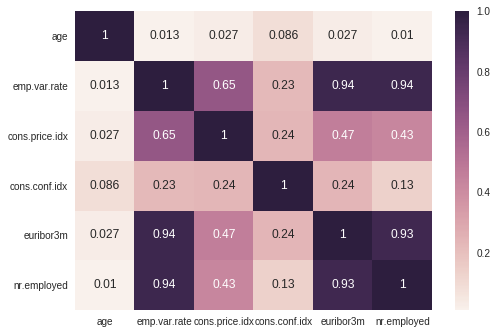

In [11]:
sb.heatmap(train_corrmat, annot=True)

Here we can see something interesting: 'euribor3m', 'nr.employed' and 'emp.var.rate' are strongly correlated.
From the data guide, we see that these are all different ways of diagnosing the socio-economic environment, at the time of the call. In other words, they don't have anything to do with the participants themselves.  

Well, it would certainly make sense that measures of the economy correlate with other measures of the economy. We want to get a simple-working model up and running as soon as possible, so let's just keep one of these metrics for the moment. It's entirely possible that we might need all 3 metrics for fine tuning, but best not to overcomplicates things from the get-go.

Which one do we drop? While they are all "quaterly" average measures, according to the instructions, only one of them gives a daily running average, and that's the 'euribor' which seems to be a measure of interest rates. Perhaps this daily variation will tell us more about the specific conditions for each caller. Admiddetly, this is a rather arbitray choice, but we the point is to simplify the dataset while we develop a strategy.

In [12]:
redundant_cols = ["nr.employed", "emp.var.rate"]

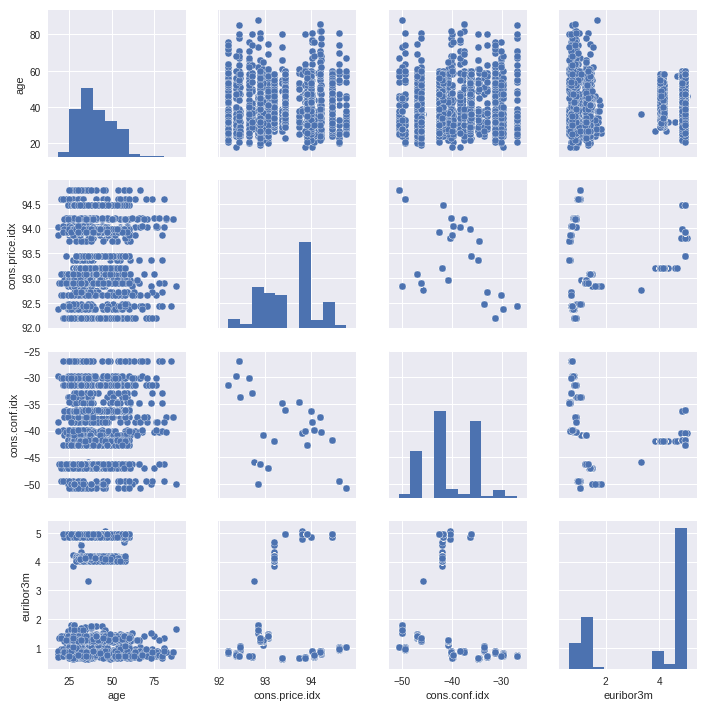

In [13]:
sb.pairplot(train.drop(redundant_cols+non_quantitative, axis=1))

### 5) Numberize some of the pseudo-numerical data, like Month and Day of the Week

In [14]:
# Make a copy of the data frame, before we start modifying anything:
train_original = train.copy()

Some easy things we can convert are month and day of the week to 1-12 and 1-7

In [15]:
def relabelData(input_labels, input_frame, column):
    
    for i in range(0,len(input_frame[column])):
        for j in range(0,len(input_labels)):
            if input_frame[column].values[i] == input_labels[j]:
                input_frame[column].values[i] = j
                
    return input_frame[column]
                


In [16]:
#%%timeit
months = ['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']  
train.month = relabelData(months, train, "month")

# Add one so that the month numbers correspond to conventional dates - Jan = 1, etc.
train.month+=1

In [17]:
train.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,5,fri,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,5,fri,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,6,wed,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,6,fri,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,11,mon,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


Re-label days of the week

In [18]:
#%%timeit 
weekdays = ['sun','mon','tue','wed','thu','fri','sat']  
train.day_of_week = relabelData(weekdays, train,"day_of_week")

train.day_of_week+=1

train.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,5,6,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,5,6,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,6,4,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,6,6,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,11,2,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


So those were fairly straightforward, since months and days of the week have an obvious order to them. Some other attributes are also fairly simple, as in marital status which has only two possible values; we can binarize it. But what do we do with things like "job" and "education"? We'll have to be a bit more arbitrary about it, if we want to do any numerical analysis or apply vectorized routines to speed things up. At least Education has a kind of chronology to it- high-school before university, and so on. If we enforce an order on something like "job" though, we're implicitly making assumptions about its correlation with other data. If we order "services" before "blue-color", then we're letting our bias about which jobs pay better, enter into the process. Conflating income level with "job".

Also, there are several columns which, despite taking numeric values, are rather opaque. It seemed safe enough to go ahead and assume "month" means month, but let's take a deeper look at the explanations given in the online archive for the other columns. The most glaring issue is that it's not apparent which column indicates the outcome of each call. The last column looks like the best bet, but let's have a quick read to be sure.

### 6) Binarize the objective label: Convert "yes" or "no" to 0 or 1. 
Not entirely necessary yet, not likely will be, if we try to apply any sort of logistic regression, etc.

In [19]:
y_results = ["no","yes"]  
train.y = relabelData(y_results, train, "y")

train.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,5,6,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,0
1,39,services,single,high.school,no,no,no,telephone,5,6,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,0
2,25,services,married,high.school,no,yes,no,telephone,6,4,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,0
3,38,services,married,basic.9y,no,unknown,unknown,telephone,6,6,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,0
4,47,admin.,married,university.degree,no,yes,no,cellular,11,2,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,0


# 7) Pre-analysis: Categorical data

Now let's take a look at some of our categorical data. For starters, just look at t he attributes that are intrinsic attribut.
es of the participant- not the phone they used, not what the economic weather was like. This leaves education, job, and age. Well, marital status, housing, financial status can arguably be "intrinsic", but let's start with the basics. 

Perhaps we can agree that age would be the most objective, quantitatve attribute of a caller, among the data we have. Let's start there:

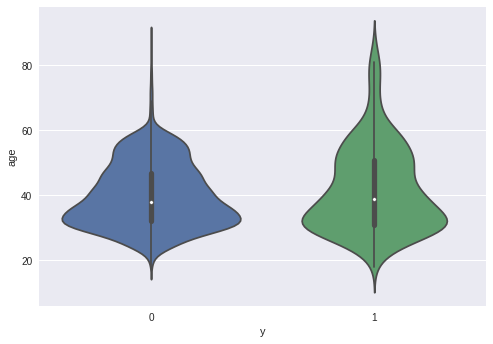

In [29]:
# Age distributions of yesses and nos:
sb.violinplot(x="y", y="age", data=train)

Without getting to an objective measure here, it as at least visually obvious that the yesses (1s) have a thicker tail out past the retirement ages (though we can't assume yet that all these people are "retired" per-se).

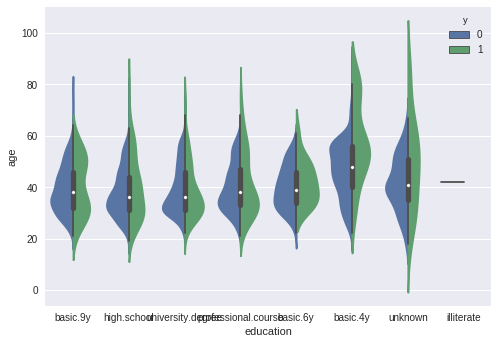

In [22]:
# Education-age demographics
sb.violinplot(x="education", y="age",hue="y", data=train, split=True)

While this is still just a first-look at the data, it is quite interesting to see a bimodal distribution of "basic.4" folks, who said "yes". Perhaps these are the source over the over-60 tail of yessers from the previous plot.  There is a similar for the "basic.9y"s over 45 or so. Oddly, we don't see the same with "basic.6y", the intermediate education value. Let's not speculate too much yet though. 

We may want to convert these labels to "years of education", and consider applying a more quantitative analysis.

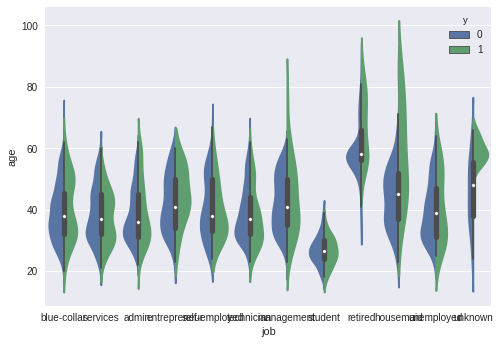

In [23]:
# Job-age demographic
sb.violinplot(x="job", y="age",hue="y", data=train, split=True)

The "retired" category is interesting. Maybe we would not be wrong in assuming our retirement-aged yessers are in-fact retired. But then again, we see an extended advanced-age-tail with the "housemaid" category as well, not to mention the near-60 peak within the "unknown" category.

Now we've actually gotten a bit ahead of ourselves. Pandas may be "automatically" omitting some bad values. That's very nice of it, but we want to have our own concrete process for excluding data, rather than leaving it all up to silent built-in subroutines.